# XAI Assignment 4
This is the implementation of XAI Assignment 4.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Anannyachuli/Interpretable-Models/blob/main/XAI_Assignment_4.ipynb)

# **MDI+: Flexible Tree-Based Feature Importance**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('winequality-red.csv')

In [ ]:
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
importances = model.feature_importances_

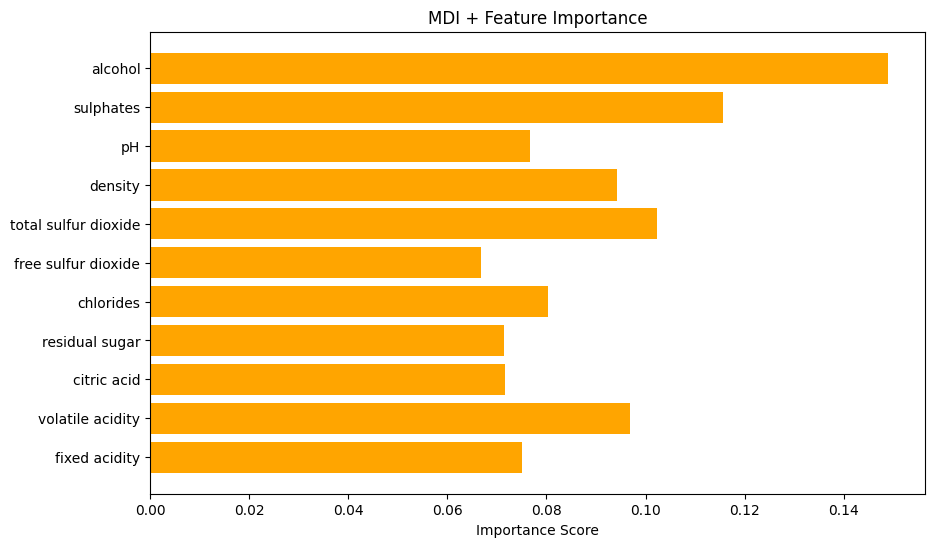

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances, color='orange')
plt.xlabel('Importance Score')
plt.title('MDI + Feature Importance')
plt.show()

**The graph demonstrates the feature importance using the MDI+ Flexible Tree-Based Feature Importance approach, with ‘alcohol,’ ‘sulphates,’ and ‘density’ being the most influential features.**

**Checking Cross-Validation for Robustness**

I am implementing cross-validation to ensure that the feature importances are stable across different subsets of the data.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validated accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-validated accuracy: 0.73 ± 0.04


To ensure the robustness of this importance distribution, I performed a cross-validation procedure with 5 folds. The cross-validated accuracy is  0.73 ± 0.04 , which indicates stable performance across different subsets of the data. The low standard deviation ( 0.04 ) in accuracy suggests that the model consistently performs well, regardless of which data subsets are used during validation, further supporting the stability of the feature importance derived from the MDI+ method.

**Checking For Permutation Feature Importance**

Using permutation importance to assess how each feature affects model performance when its values are shuffled.


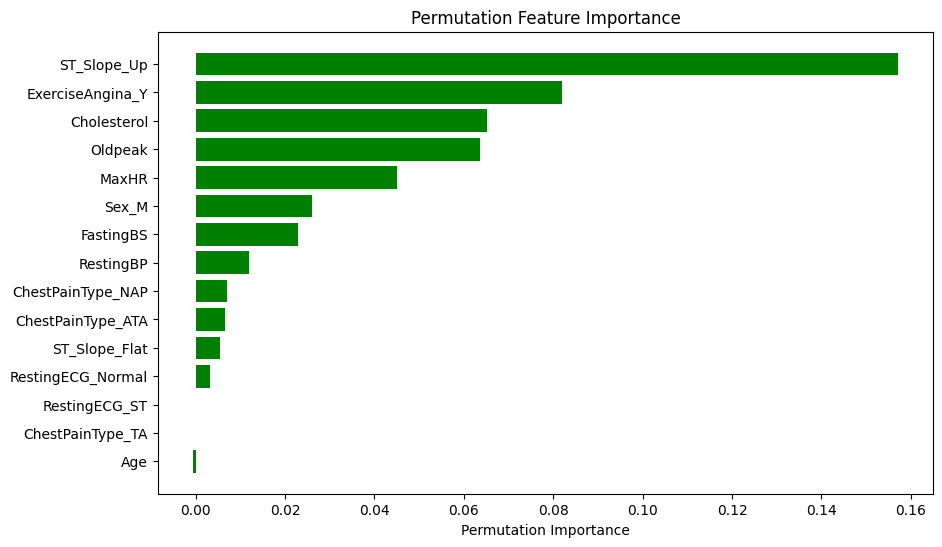

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color='green')
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.show()

**Partial Dependence Plots**

Visualize the relationship between features and the target variable using partial dependence plots

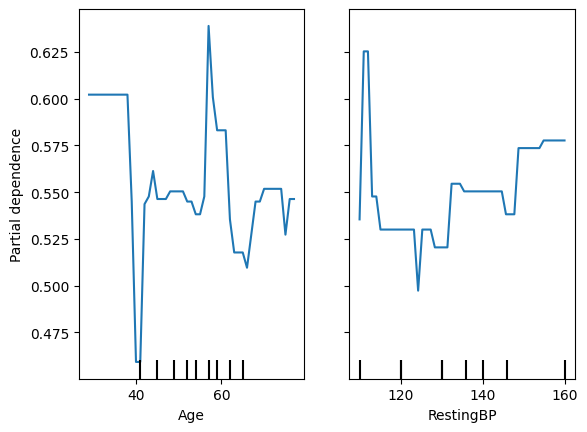

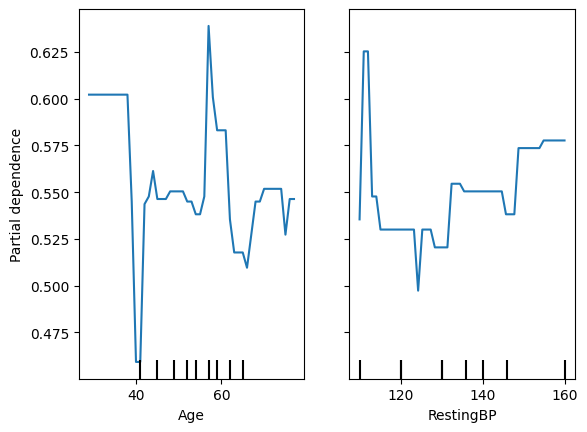

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

display = PartialDependenceDisplay.from_estimator(
    model, X_train, [0, 1], feature_names=X.columns, grid_resolution=50
)
display.plot()
plt.show()

# **Block Diagram for MDI Algorithm**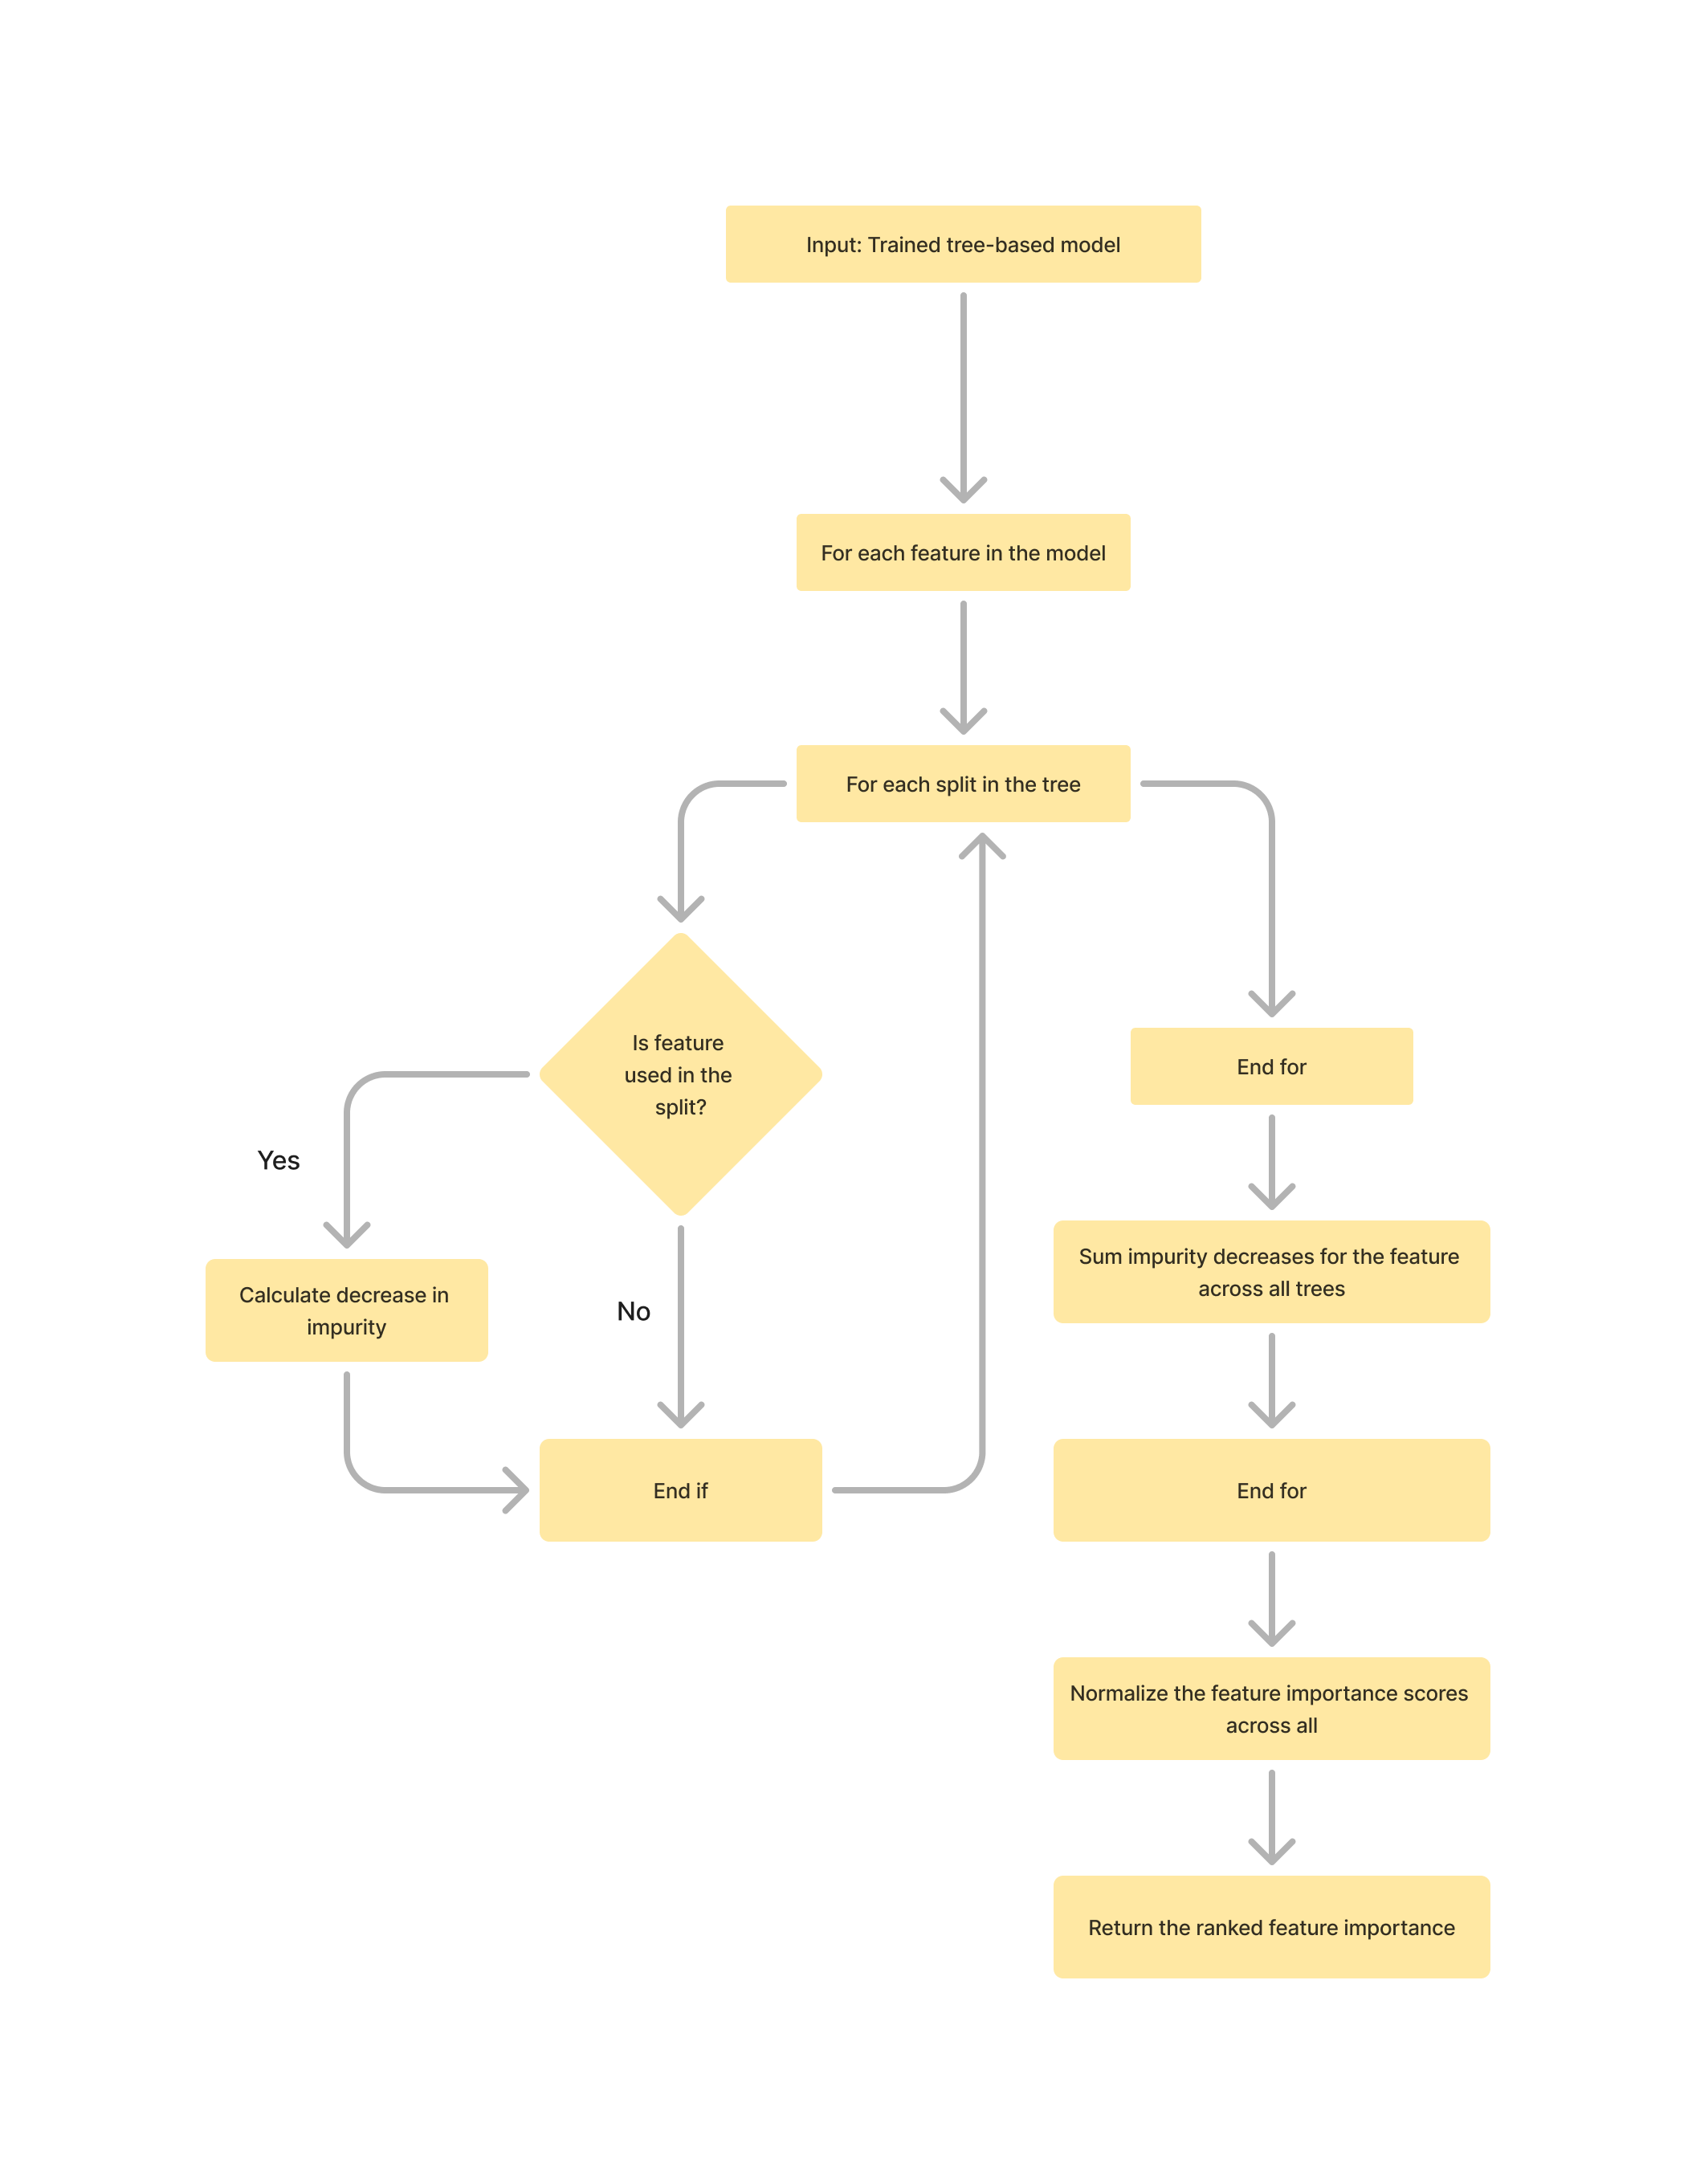


# **FIGS: Fast interpretable greedy-tree sums**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)

In [ ]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.84


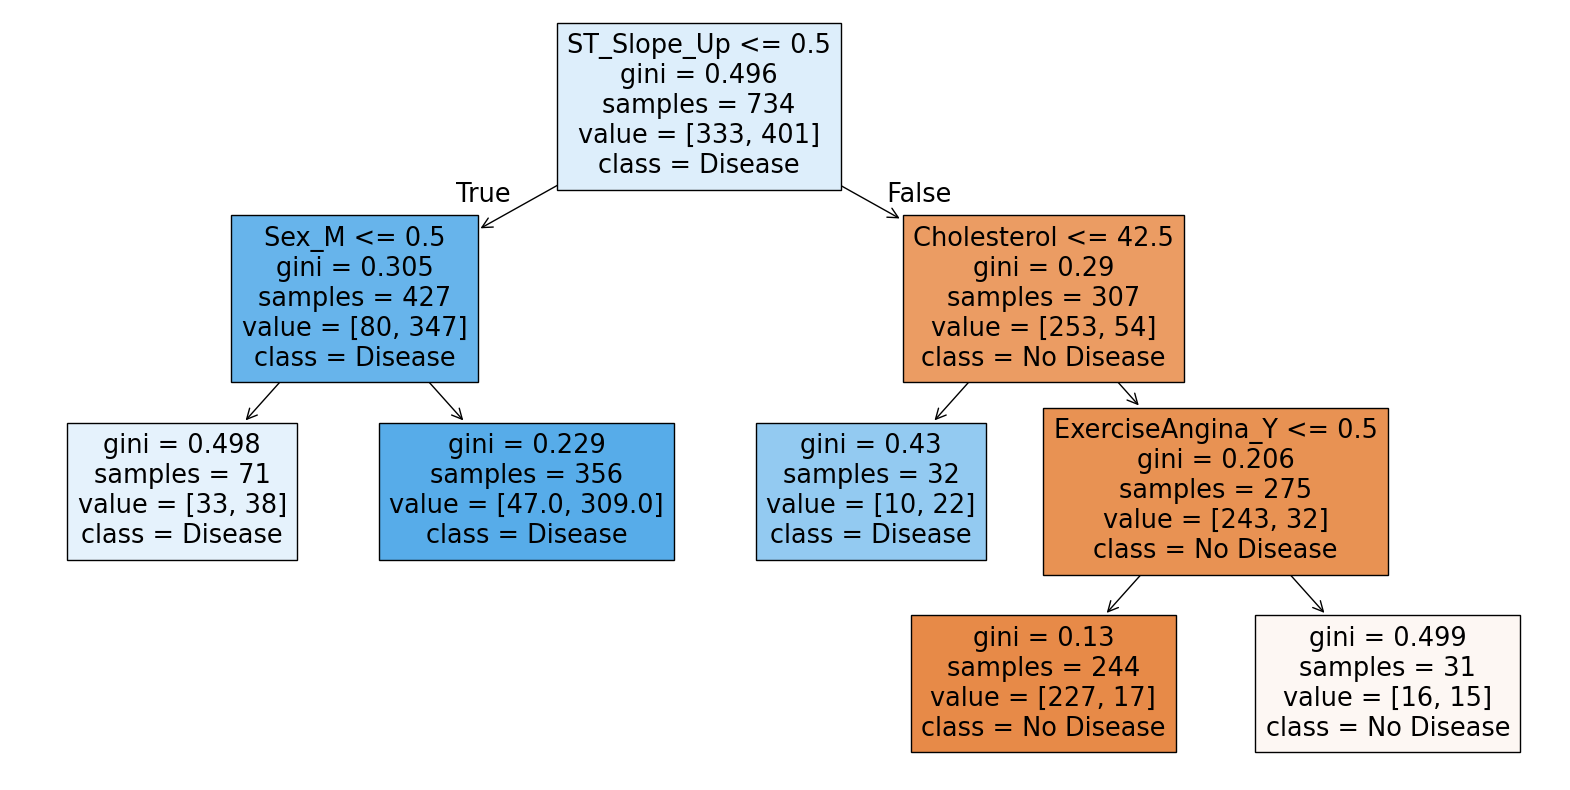

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

# **Block Diagram For FIGS**

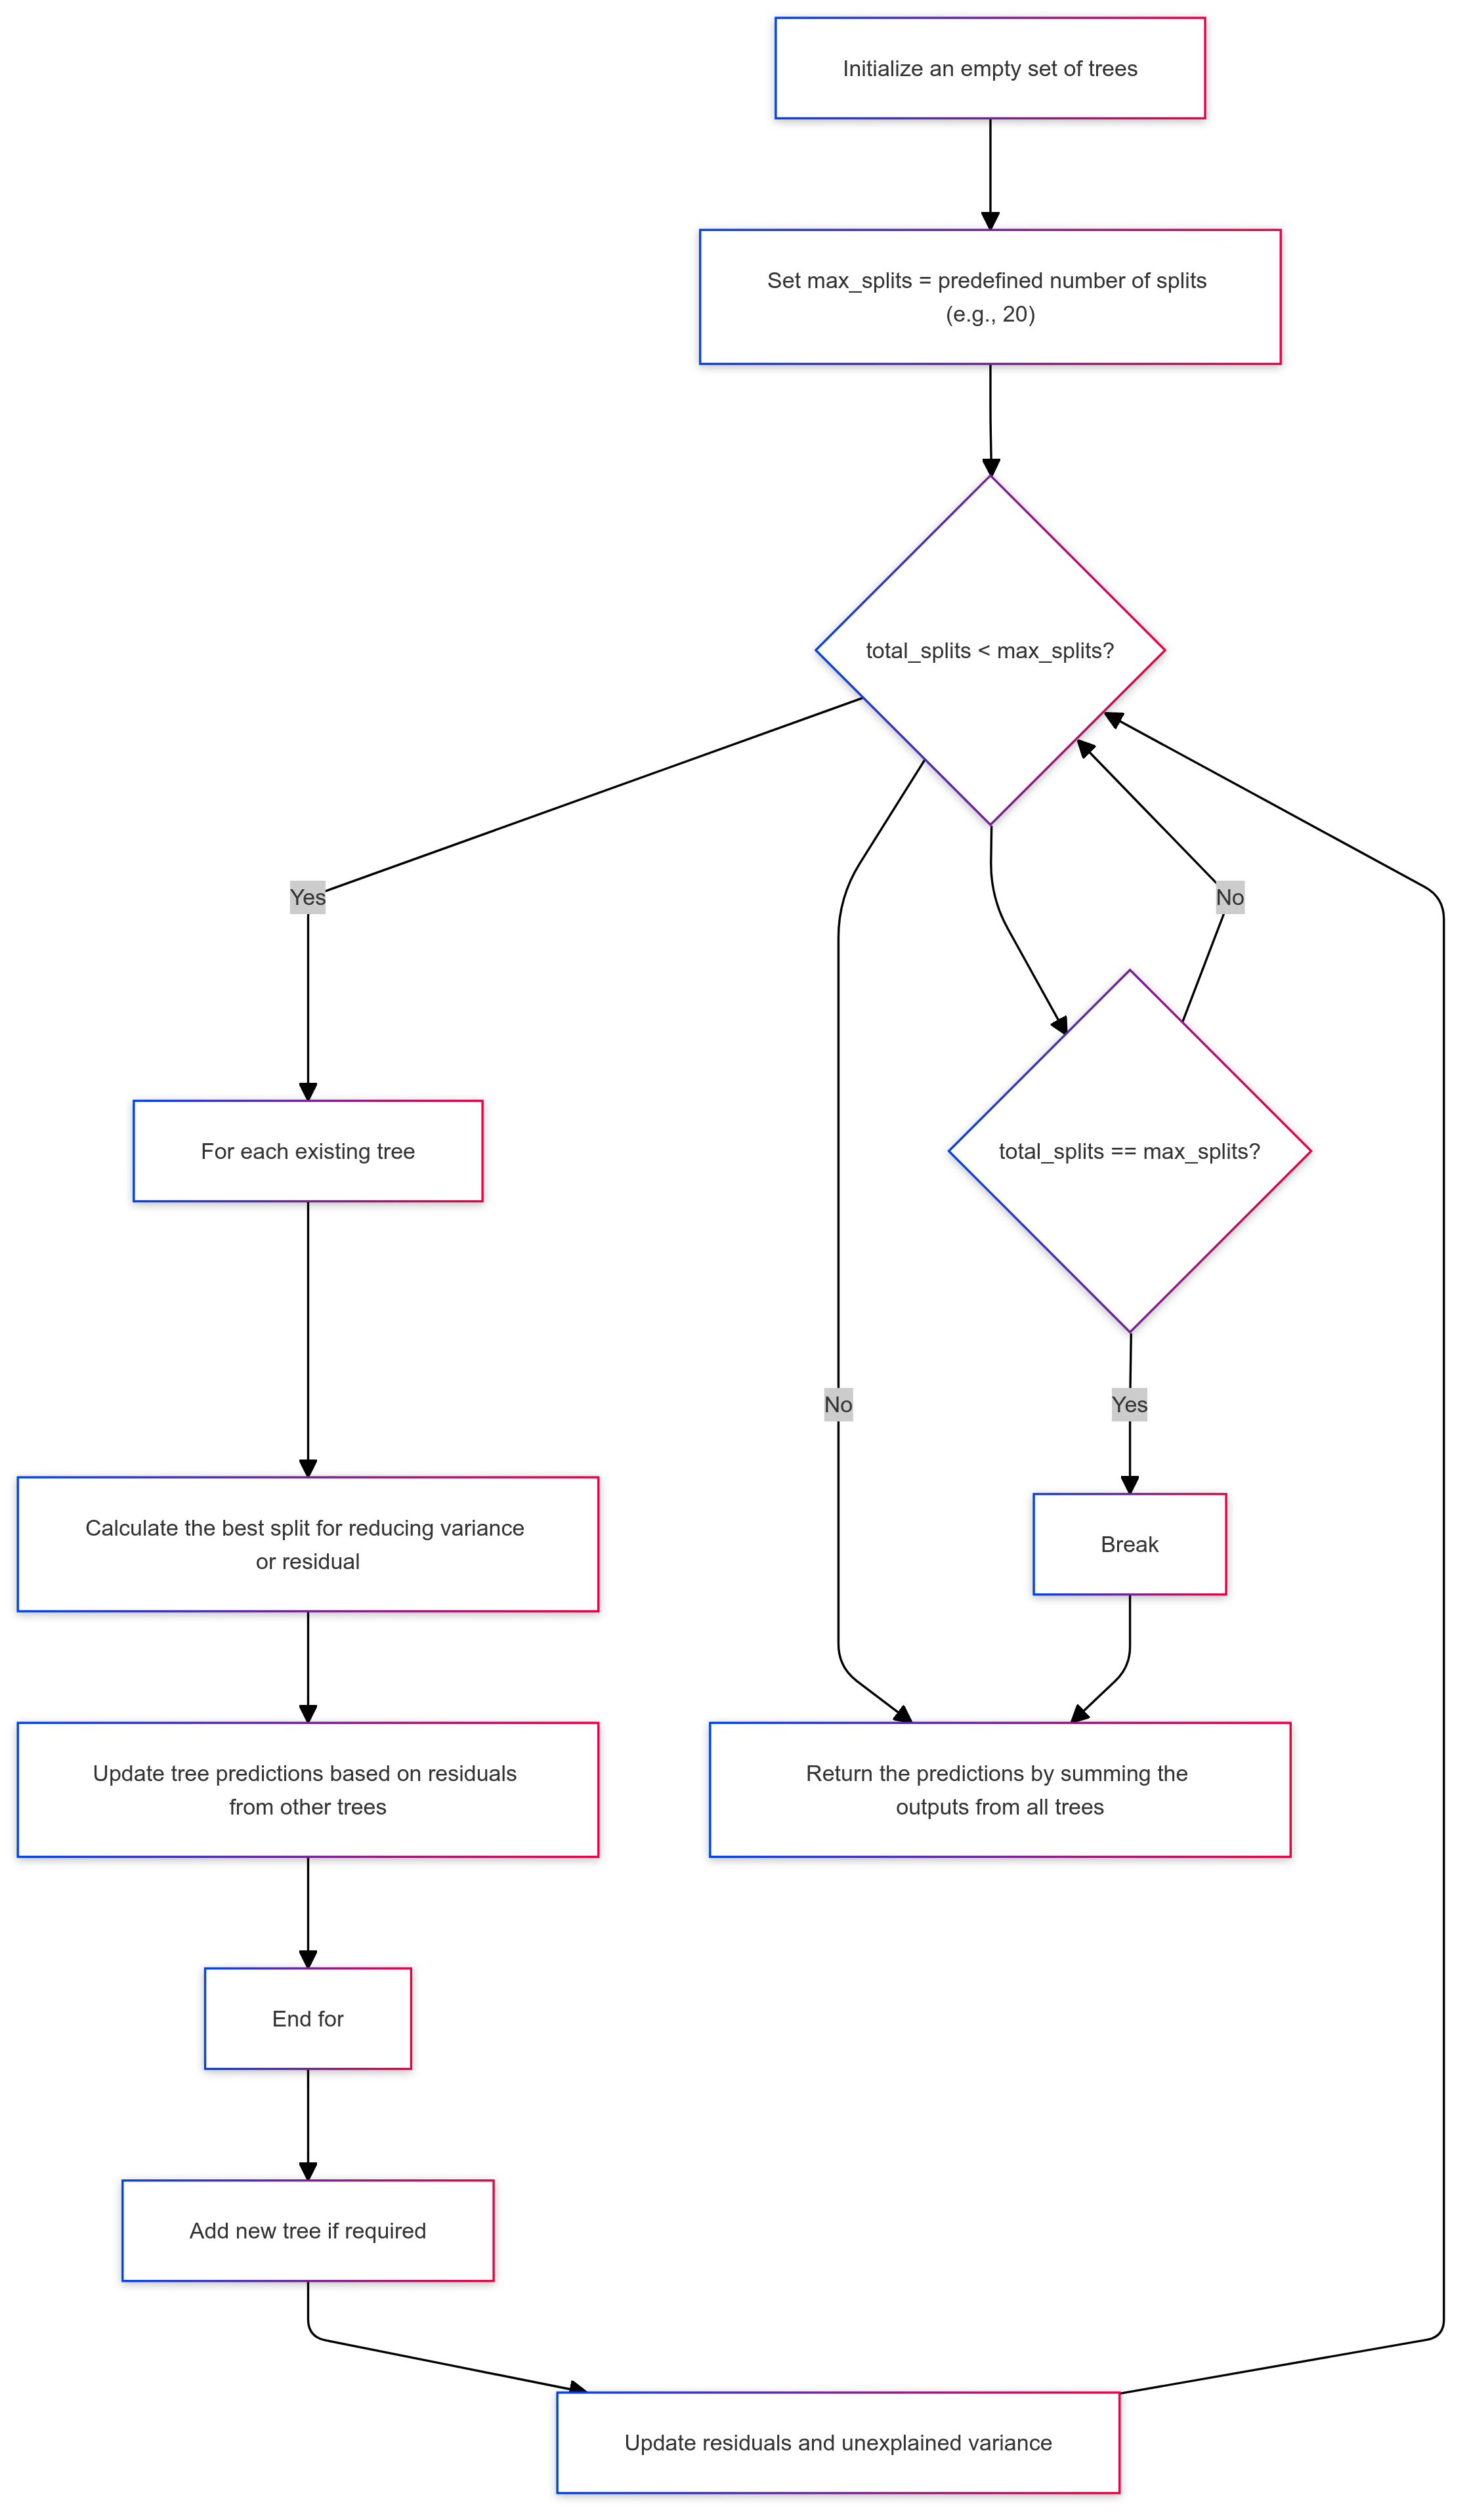

# **Hierarchical Shrinkage**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
def hierarchical_shrinkage(tree, X, y):
    leaf_indices = tree.apply(X)
    unique_leaf_indices = np.unique(leaf_indices)
    # Use the provided y to calculate node_means for the corresponding set
    node_means = {index: np.mean(y[leaf_indices == index]) for index in unique_leaf_indices}
    shrunk_predictions = np.array([node_means[index] for index in leaf_indices])
    return shrunk_predictions

shrunk_train_preds = hierarchical_shrinkage(model, X_train, y_train)

# Use test labels for mean calculation when applying to the test set
shrunk_test_preds = hierarchical_shrinkage(model, X_test, y_test)

# Convert shrunk predictions to binary outcomes based on threshold (e.g., 0.5)
shrunk_test_preds_binary = (shrunk_test_preds > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, shrunk_test_preds_binary)

print(f"Shrunk Model Accuracy: {accuracy:.2f}")

Shrunk Model Accuracy: 0.91


**Tuning the hyperparameters to check improvement of feature importance insights and model performance**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


# **Block Diagram For Heirarchial Shrinkage**

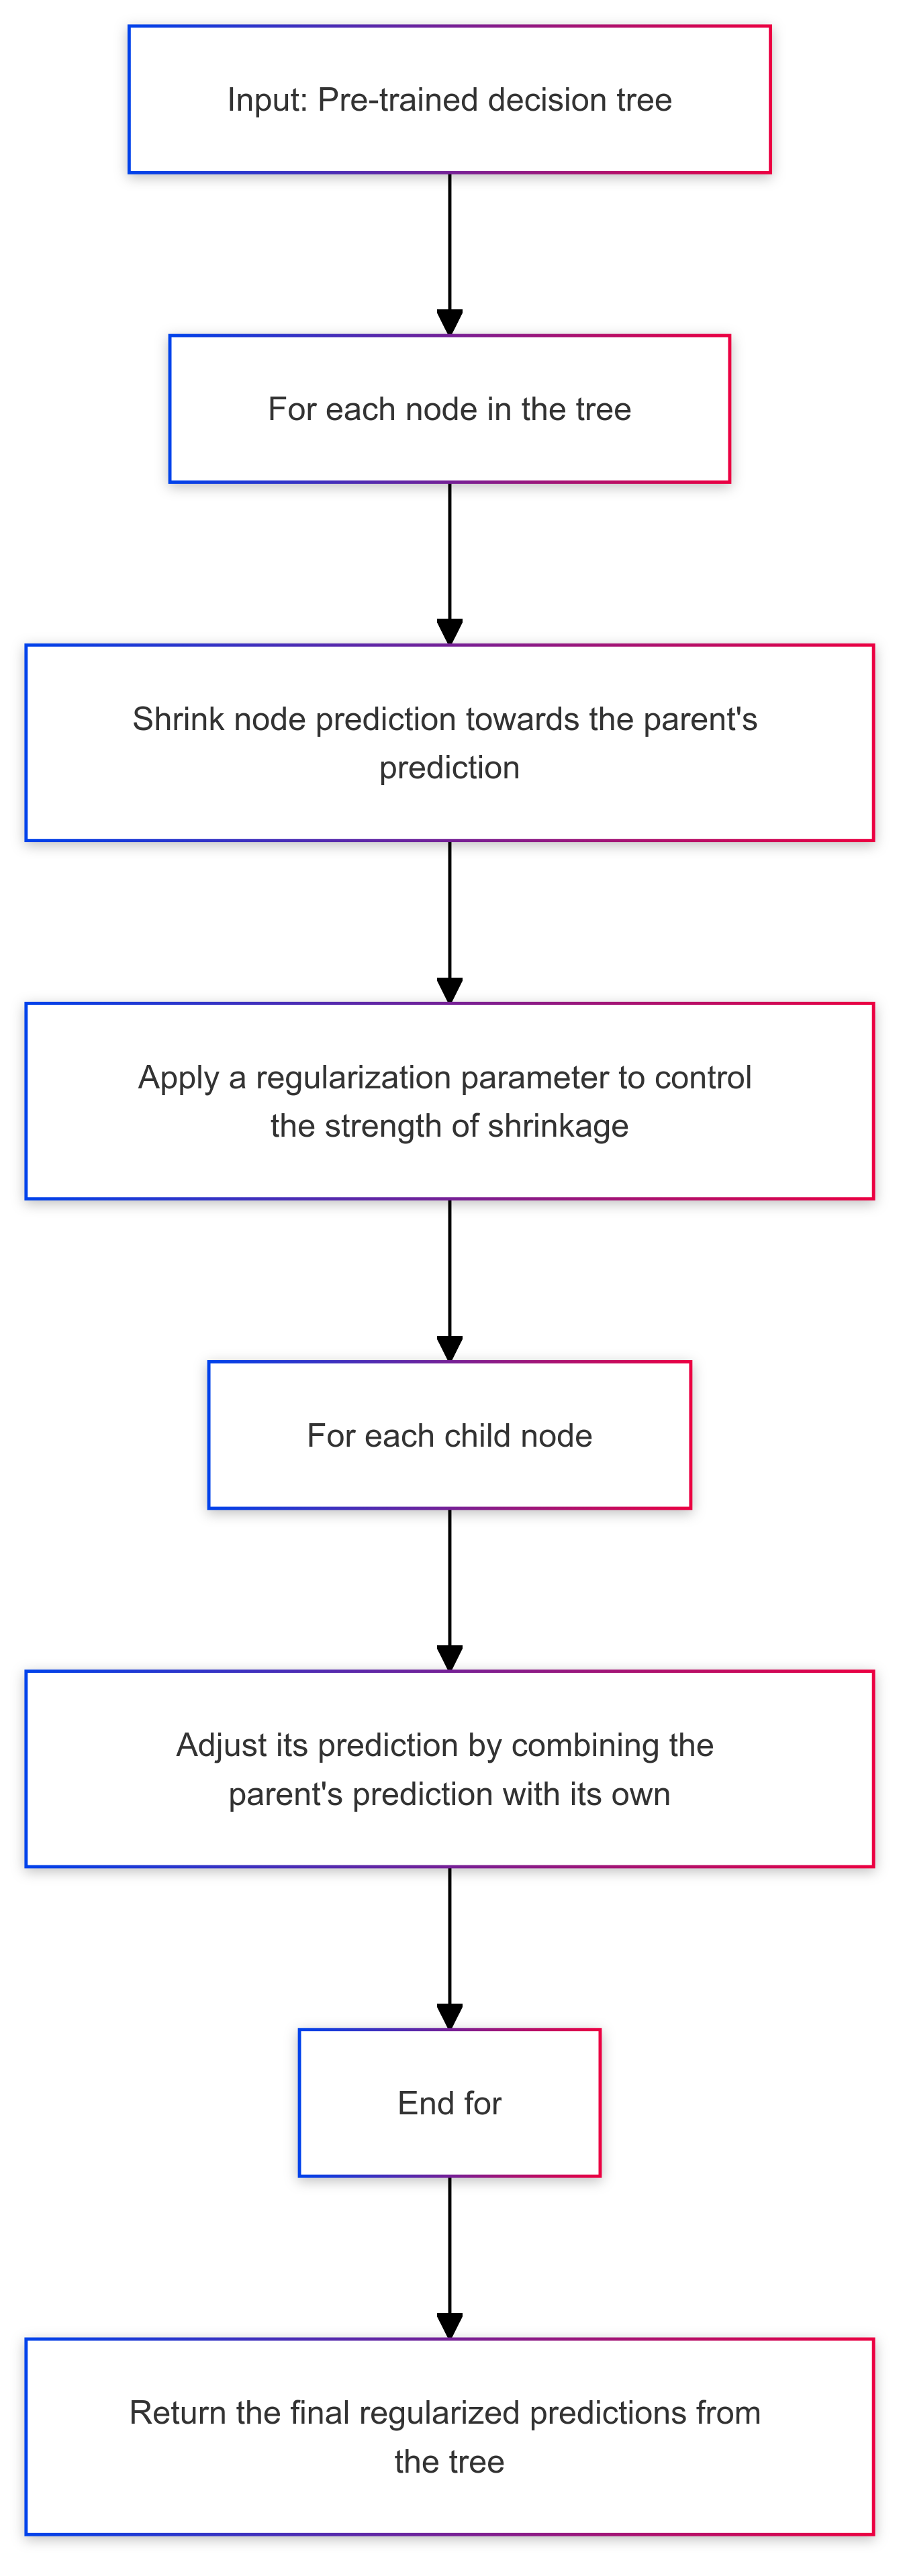